<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/K_Nearest_Neighbors_(KNN)_emaildataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/knndataset/emails.csv')


In [5]:
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
 
    valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
 0       0    0               0         0         0   0    0           0  
 1       0    0               0         0         0   1    0           0  
 2       0    0               0         0         0   0    0           0  
 3       0    0               0         0         0   0    0           0  
 4       0    0               0         0         0   1    0           0  
 
 [5 rows x 3002 columns],
 None)

The dataset is a text feature matrix where each row represents an email, with word frequencies as features and a Prediction column (likely 0 = not spam, 1 = spam) as the target.

Proceeding with KNN modeling steps:
Drop irrelevant columns (like Email No.).

Scale features.

Train/test split.

Initialize and train a KNN model.

Evaluate performance and tune hyperparameters.

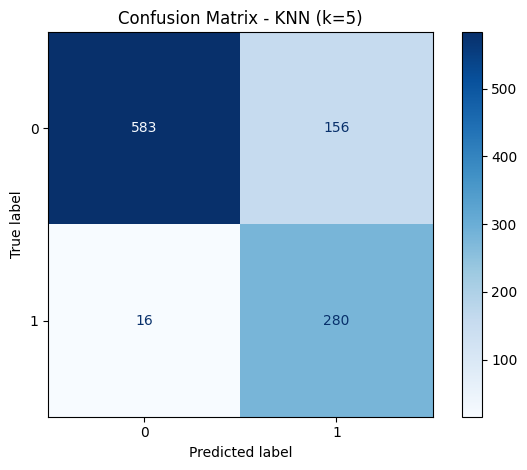

('              precision    recall  f1-score   support\n\n           0       0.97      0.79      0.87       739\n           1       0.64      0.95      0.77       296\n\n    accuracy                           0.83      1035\n   macro avg       0.81      0.87      0.82      1035\nweighted avg       0.88      0.83      0.84      1035\n',
 0.8338164251207729,
 0.6422018348623854,
 0.9459459459459459,
 0.7650273224043715)

In [6]:
df_clean = df.drop(columns=["Email No."])

# Step 2: Define features and target
X_email = df_clean.drop("Prediction", axis=1)
y_email = df_clean["Prediction"]

# Step 3: Scale features
scaler = StandardScaler()
X_email_scaled = scaler.fit_transform(X_email)

# Step 4: Train-test split
Xe_train, Xe_test, ye_train, ye_test = train_test_split(X_email_scaled, y_email, test_size=0.2, random_state=42)

# Step 5: Initialize KNN (default K=5, Euclidean distance)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xe_train, ye_train)

# Step 6: Predictions and evaluation
ye_pred = knn.predict(Xe_test)

acc = accuracy_score(ye_test, ye_pred)
prec = precision_score(ye_test, ye_pred)
rec = recall_score(ye_test, ye_pred)
f1 = f1_score(ye_test, ye_pred)
report = classification_report(ye_test, ye_pred)
cm = confusion_matrix(ye_test, ye_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN (k=5)')
plt.tight_layout()
plt.show()

report, acc, prec, rec, f1

**Dimentionality Reduction**


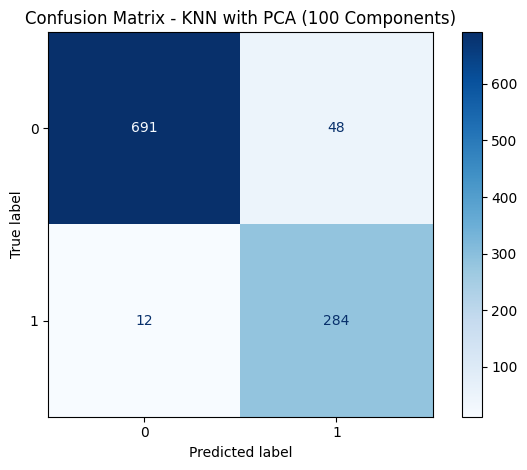

('              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96       739\n           1       0.86      0.96      0.90       296\n\n    accuracy                           0.94      1035\n   macro avg       0.92      0.95      0.93      1035\nweighted avg       0.95      0.94      0.94      1035\n',
 0.9420289855072463,
 0.8554216867469879,
 0.9594594594594594,
 0.9044585987261147)

In [7]:
from sklearn.decomposition import PCA

# Step 1: Scale features (already done, using previous scaler object)
# Step 2: Apply PCA to reduce to 100 components
pca = PCA(n_components=100, random_state=42)
X_email_pca = pca.fit_transform(X_email_scaled)

# Step 3: Train-test split
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_email_pca, y_email, test_size=0.2, random_state=42)

# Step 4: Train KNN
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(Xpca_train, ypca_train)

# Step 5: Predictions and evaluation
ypca_pred = knn_pca.predict(Xpca_test)

acc_pca = accuracy_score(ypca_test, ypca_pred)
prec_pca = precision_score(ypca_test, ypca_pred)
rec_pca = recall_score(ypca_test, ypca_pred)
f1_pca = f1_score(ypca_test, ypca_pred)
report_pca = classification_report(ypca_test, ypca_pred)
cm_pca = confusion_matrix(ypca_test, ypca_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=knn_pca.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN with PCA (100 Components)')
plt.tight_layout()
plt.show()

report_pca, acc_pca, prec_pca, rec_pca, f1_pca
